In [1]:
%load_ext autoreload
%autoreload 2

There are multiple ways to inflate the type-I error rate. The following [paper](https://journals.sagepub.com/doi/pdf/10.1177/0956797611417632):
Simmons, J.P., Nelson, L.D. and Simonsohn, U., 2011. False-positive psychology: Undisclosed flexibility in data collection and analysis allows presenting anything as significant. Psychological science, 22(11), pp.1359-1366.
lists a few different ways this could happen. Most problems stem from some form of multiple comparisons (looking at your data multiple times, or performing a significance test for the same hypothesis in several different ways).

In [2]:
from scipy.stats import ttest_ind
import numpy as np

import matplotlib.pyplot as plt

In [3]:
import sys
sys.path.insert(0, '/home/src/')

In [4]:
from simulations import simulate_normal

# Question 1

In [26]:
n = 2100
size_effect = 0.0
nb_effects = 0
PVALUES = []
for _ in range(20):
    samples = simulate_normal(sample_mean=0.0, 
                              sample_std=1.0, 
                              sample_size=n,
                              number_simulations=2,
                             )
    x = samples[:,0]
    y = samples[:,1] + size_effect

    p_values = []
    for ii in range(10, n+1):
        p_values.append(ttest_ind(x[:ii], y[:ii], equal_var=True).pvalue)
    PVALUES.append(p_values)
    min_p_value = min(p_values)
    if min_p_value <= 0.05:
        text = "=> EFFECT DETECTED"
        nb_effects += 1
    else:
        text = ""
    print(f"{min_p_value:.3f} {text}")
print(f"We detected a total of {nb_effects} effects")

0.065 
0.005 => EFFECT DETECTED
0.018 => EFFECT DETECTED
0.010 => EFFECT DETECTED
0.010 => EFFECT DETECTED
0.002 => EFFECT DETECTED
0.185 
0.325 
0.131 
0.024 => EFFECT DETECTED
0.028 => EFFECT DETECTED
0.013 => EFFECT DETECTED
0.013 => EFFECT DETECTED
0.008 => EFFECT DETECTED
0.008 => EFFECT DETECTED
0.219 
0.008 => EFFECT DETECTED
0.014 => EFFECT DETECTED
0.057 
0.030 => EFFECT DETECTED
We detected a total of 14 effects


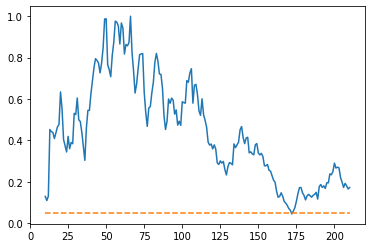

In [22]:
fix, ax = plt.subplots(1,1)
xx = range(10, n+1)
ax.plot(xx, p_values)
ax.plot([xx[0], xx[-1]], [0.05, 0.05],'--')

(2000.0, 2100.0)

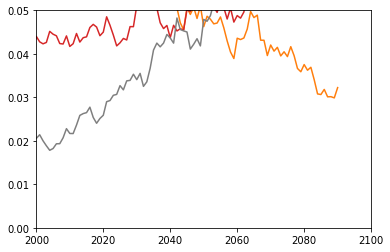

In [31]:
fig, ax = plt.subplots(1,1)
ax.plot(np.array(PVALUES).T);
ax.set_ylim(0,0.05);
ax.set_xlim(2000,2100);

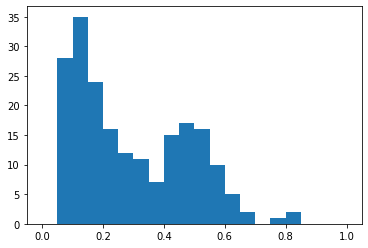

In [7]:
plt.hist(p_values, bins=20, range=[0.,1.]);

# Question 2

In [104]:
n = 210
size_effect = 0.3
nb_effects = 0
nb_effects_100 = 0
for _ in range(20):
    samples = simulate_normal(sample_mean=0.0, 
                              sample_std=1.0, 
                              sample_size=n,
                              number_simulations=2,
                             )
    x = samples[:,0]
    y = samples[:,1] + size_effect

    p_values = []
    for ii in range(10, n+1):
        p_values.append(ttest_ind(x[:ii], y[:ii], equal_var=True).pvalue)
    min_p_value = min(p_values)
    if min_p_value <= 0.05:
        text = "=> EFFECT DETECTED"
        nb_effects += 1
    else:
        text = ""
    print(f"{min_p_value:.3f} {text}")
    print(f"p_values @ 100: {p_values[99]:.3f}")
    if p_values[99] <= 0.05:
        nb_effects_100 += 1
print(f"We detected a total of {nb_effects} effects")
print(f"We detected a total of {nb_effects_100} effects at 100")


0.000 => EFFECT DETECTED
p_values @ 100: 0.002
0.001 => EFFECT DETECTED
p_values @ 100: 0.053
0.006 => EFFECT DETECTED
p_values @ 100: 0.124
0.001 => EFFECT DETECTED
p_values @ 100: 0.002
0.000 => EFFECT DETECTED
p_values @ 100: 0.002
0.036 => EFFECT DETECTED
p_values @ 100: 0.456
0.162 
p_values @ 100: 0.672
0.000 => EFFECT DETECTED
p_values @ 100: 0.000
0.000 => EFFECT DETECTED
p_values @ 100: 0.011
0.014 => EFFECT DETECTED
p_values @ 100: 0.076
0.036 => EFFECT DETECTED
p_values @ 100: 0.592
0.003 => EFFECT DETECTED
p_values @ 100: 0.013
0.004 => EFFECT DETECTED
p_values @ 100: 0.361
0.000 => EFFECT DETECTED
p_values @ 100: 0.006
0.010 => EFFECT DETECTED
p_values @ 100: 0.233
0.005 => EFFECT DETECTED
p_values @ 100: 0.097
0.003 => EFFECT DETECTED
p_values @ 100: 0.167
0.000 => EFFECT DETECTED
p_values @ 100: 0.001
0.000 => EFFECT DETECTED
p_values @ 100: 0.000
0.000 => EFFECT DETECTED
p_values @ 100: 0.010
We detected a total of 19 effects
We detected a total of 10 effects at 100


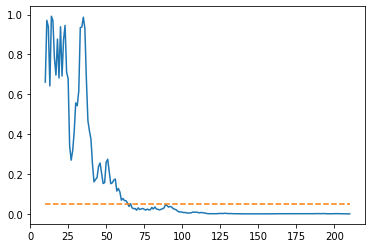

In [105]:
fix, ax = plt.subplots(1,1)
xx = range(10, n+1)
ax.plot(xx, p_values)
ax.plot([xx[0], xx[-1]], [0.05, 0.05],'--')

answer: C

# Question 3

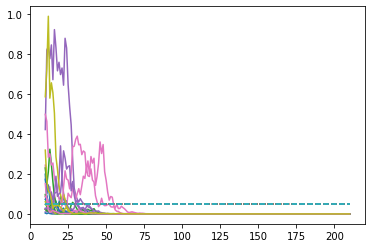

In [106]:
n = 210
size_effect = 0.8
nb_effects = 0
nb_effects_100 = 0
fig, ax = plt.subplots(1,1)
xx = range(10, n+1)
for _ in range(20):
    samples = simulate_normal(sample_mean=0.0, 
                              sample_std=1.0, 
                              sample_size=n,
                              number_simulations=2,
                             )
    x = samples[:,0]
    y = samples[:,1] + size_effect

    p_values = []
    for ii in range(10, n+1):
        p_values.append(ttest_ind(x[:ii], y[:ii], equal_var=True).pvalue)

    ax.plot(xx, p_values)
    ax.plot([xx[0], xx[-1]], [0.05, 0.05],'--')

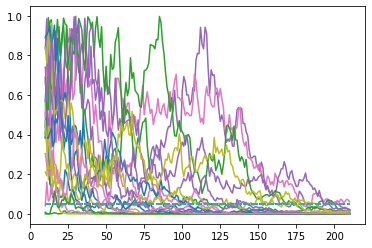

In [107]:
n = 210
size_effect = 0.3
fig, ax = plt.subplots(1,1)
xx = range(10, n+1)
for _ in range(20):
    samples = simulate_normal(sample_mean=0.0, 
                              sample_std=1.0, 
                              sample_size=n,
                              number_simulations=2,
                             )
    x = samples[:,0]
    y = samples[:,1] + size_effect

    p_values = []
    for ii in range(10, n+1):
        p_values.append(ttest_ind(x[:ii], y[:ii], equal_var=True).pvalue)

    ax.plot(xx, p_values)
    ax.plot([xx[0], xx[-1]], [0.05, 0.05],'--')

answer: B

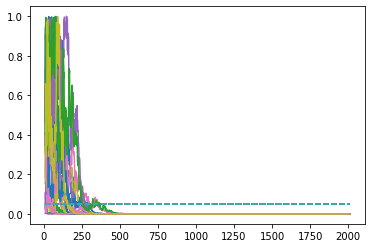

In [108]:
n = 2010
size_effect = 0.3
fig, ax = plt.subplots(1,1)
xx = range(10, n+1)
for _ in range(20):
    samples = simulate_normal(sample_mean=0.0, 
                              sample_std=1.0, 
                              sample_size=n,
                              number_simulations=2,
                             )
    x = samples[:,0]
    y = samples[:,1] + size_effect

    p_values = []
    for ii in range(10, n+1):
        p_values.append(ttest_ind(x[:ii], y[:ii], equal_var=True).pvalue)

    ax.plot(xx, p_values)
    ax.plot([xx[0], xx[-1]], [0.05, 0.05],'--')

# Question 4

In [50]:
n = 110
# We look for type-I error rate; so set size_effect to 0.0
size_effect = 0.0
alpha = 0.05
nb_repeats = 50000
nb_looks = 5

samples =  np.random.randn(nb_repeats*2*n).reshape((nb_repeats,n,2))
PVALUES = []

for exp_idx in range(nb_repeats):
    x = samples[exp_idx,:,0]
    y = samples[exp_idx,:,1] + size_effect

    p_values = []
    # Calculate the p-values after each look
    for ii in np.linspace(0,n+1,nb_looks+1,dtype=int)[1:]:
        p_values.append(ttest_ind(x[:ii], y[:ii], equal_var=True).pvalue)

    PVALUES.append(p_values)

In [51]:
# we simulate optional stopping
# so we stop the experiment (and report the p-value) when an effect is detected,
# otherwise we report the last p-value
PVALUES_arr = np.array(PVALUES);
report_pvalues = PVALUES_arr[:,-1]
idx = PVALUES_arr.min(axis=1) < alpha
report_pvalues[idx] = PVALUES_arr.min(axis=1)[idx]

In [52]:
PVALUES_arr.shape, report_pvalues.shape

((50000, 5), (50000,))

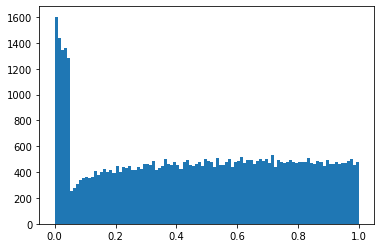

In [53]:
plt.hist(report_pvalues, bins=100, range=[0.0, 1.0]);

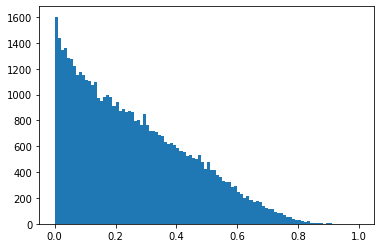

In [54]:
# this is not what we're looking for; but just for checking
plt.hist(np.array(PVALUES).min(axis=1), bins=100, range=[0.0, 1.0]);

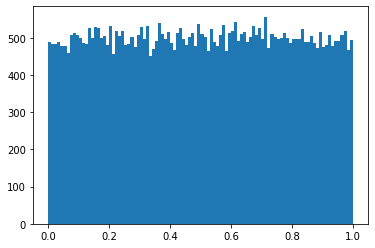

In [56]:
# this is not what we're looking for; but just for checking
plt.hist(np.array(PVALUES)[:,-1], bins=100, range=[0.0, 1.0]);

answer: B

# Question 5

In [12]:
# We compute the minimum p-value found, after each look
runningmin_PVALUES = np.copy(PVALUES)
for ii in range(1, 5):
    runningmin_PVALUES[:,ii] = PVALUES[:,:ii+1].min(axis=1)

Text(0, 0.5, 'Type I error rate')

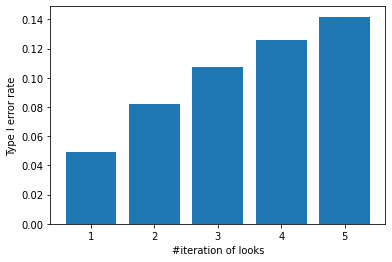

In [16]:
# type 1 error per look
fig, ax = plt.subplots(1,1)
ax.bar(x=range(1,6), height=(runningmin_PVALUES < alpha).mean(axis=0))
ax.set_xlabel('#iteration of looks')
ax.set_ylabel('Type I error rate')

In [17]:
# type 1 when optional stopping used
(PVALUES.min(axis=1) < alpha).mean()

0.1418

answer: A

# Question 6

In [18]:
n = 110
# again we look for type-I error rate, so size_effect = 0.0
size_effect = 0.0
alpha = 0.05
nb_repeats = 50000
# only look twice
nb_looks = 2

samples =  np.random.randn(nb_repeats*2*n).reshape((nb_repeats,n,2))
PVALUES = []

for exp_idx in range(nb_repeats):
    x = samples[exp_idx,:,0]
    y = samples[exp_idx,:,1] + size_effect

    p_values = []
    for ii in np.linspace(0,n+1,nb_looks+1,dtype=int)[1:]:
        p_values.append(ttest_ind(x[:ii], y[:ii], equal_var=True).pvalue)

    PVALUES.append(p_values)

In [20]:
PVALUES = np.array(PVALUES);
print(f"{(PVALUES.min(axis=1) < alpha).mean():.2f}")

0.08


answer: B

# Question 7

In [64]:
# see how the type-I error rate varies with the number of participants n
n = 200
size_effect = 0.0
alpha = 0.05
nb_repeats = 5000

samples =  np.random.randn(nb_repeats*2*n).reshape((nb_repeats,n,2))
PVALUES = []

for exp_idx in range(nb_repeats):
    x = samples[exp_idx,:,0]
    y = samples[exp_idx,:,1] + size_effect

    p_values = []
    # look all the time
    for ii in range(3,n):
        p_values.append(ttest_ind(x[:ii], y[:ii], equal_var=True).pvalue)

    PVALUES.append(p_values)

In [65]:
PVALUES_arr = np.array(PVALUES)
PVALUES_arr.shape

(5000, 197)

In [66]:
print(f"{(PVALUES_arr.min(axis=1) < alpha).mean():.2f}")

0.41


By doubling the number of participants, and looking all the time (instead of twice), the type-I error rate jumps from 8% to 41%.
Answer D

# Question 8

In [67]:
n = 110
# We look for type-I error rate; so set size_effect to 0.0
size_effect = 0.0
# We reduce the alpha_level according to the Pocock boundary for 5 looks
alpha = 0.0158
nb_repeats = 50000
nb_looks = 5

samples =  np.random.randn(nb_repeats*2*n).reshape((nb_repeats,n,2))
PVALUES = []

for exp_idx in range(nb_repeats):
    x = samples[exp_idx,:,0]
    y = samples[exp_idx,:,1] + size_effect

    p_values = []
    # Calculate the p-values after each look
    for ii in np.linspace(0,n+1,nb_looks+1,dtype=int)[1:]:
        p_values.append(ttest_ind(x[:ii], y[:ii], equal_var=True).pvalue)

    PVALUES.append(p_values)

In [75]:
PVALUES_arr = np.array(PVALUES)
# Type-I error rate at each look:
typeI_perlook = (PVALUES_arr < alpha).mean(axis=0)
for ii in range(5):
    print(f"look {ii+1}: {typeI_perlook[ii]:.3f}")
# overall type-I error rate:
print(f"overall: {(PVALUES_arr.min(axis=1) < alpha).mean():.2f}")

look 1: 0.016
look 2: 0.016
look 3: 0.017
look 4: 0.017
look 5: 0.015
overall: 0.05


Answer C

# Question 9

In [76]:
# we simulate optional stopping
# so we stop the experiment (and report the p-value) when an effect is detected,
# otherwise we report the last p-value
report_pvalues = PVALUES_arr[:,-1]
idx = PVALUES_arr.min(axis=1) < alpha
report_pvalues[idx] = PVALUES_arr.min(axis=1)[idx]

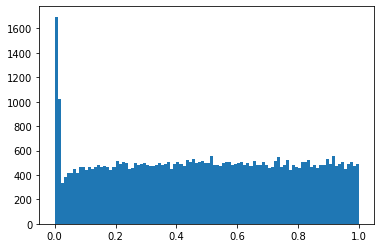

In [77]:
plt.hist(report_pvalues, bins=100, range=[0.0, 1.0]);

In [83]:
(report_pvalues < alpha).mean()

0.05188

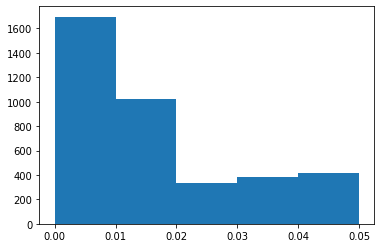

In [84]:
plt.hist(report_pvalues, bins=5, range=[0.0, 0.05]);

Both with and without Pocock boundary, small p-values (0.01) are more likely than slightly higher p-values (0.04). Answer A

An interesting article about sequential analysis:
Lakens, D., 2014. Performing high‐powered studies efficiently with sequential analyses. European Journal of Social Psychology, 44(7), pp.701-710.
https://onlinelibrary.wiley.com/doi/abs/10.1002/ejsp.2023